In [161]:
from dataset import lr_dataset
from matplotlib import pyplot as plt
from math import sqrt

In [162]:
x_train, y_train, x_test, y_test = lr_dataset()

In [163]:
def mean(x):
    return float(sum(x)/len(x))

In [164]:
def variance(x):
    M = mean(x)
    return sum((i-M)**2 for i in x)/len(x) 

In [165]:
def covariance(x, y):
    cvr = 0
    for i in range(len(x)):
        cvr+=(x[i]-mean(x))*(y[i]-mean(y))
    return cvr/(len(x)-1)

In [166]:
def avg_loss(predicted, y_test):
    loss = 0
    for i in range(len(predicted)):
        loss += abs((predicted[i]-y_test[i]))
    return loss/len(y_test)

In [167]:
def avg_rms_loss(predicted, y_test):
        loss = 0
        for i in range(len(predicted)):
            loss += (predicted[i]-y_test[i])**2
        return sqrt(abs(loss)/len(y_test))

In [168]:
def function_coeff(x, y):# y = slope*x+constant
    slope = covariance(x,y)/variance(x)
    constant = mean(y)-slope*mean(x)
    return slope, constant

In [169]:
#Here loss function is taken as |y-yi|^2
#Used gradient descent approach for modifying slope and constant 

In [170]:
def modification_in_slope(x_test, y_test, predicted_val_y):
    dslope = 0
    for i in range(len(x_test)):
        dslope+=(-3*x_test[i]*((predicted_val_y[i]-y_test[i])**2))/len(x_test)
    return dslope
    

In [171]:
def modification_in_constant(x_test, y_test, predicted_val_y):
    dconstant=0
    for i in range(len(x_test)):
        dconstant+=((-3)*(predicted_val_y[i]-y_test[i])**2)/len(x_test)
    return dconstant

In [172]:
def linear_regression(x_train,y_train, x_test, y_test, Lr):
    a,b = function_coeff(x_train, y_train)
    
    predicted_val = []
    for i in x_test:
        y_predicted = a*i+b
        predicted_val.append(y_predicted)
        
    dslope = modification_in_slope(x_test,y_test,predicted_val)
    dconstant = modification_in_constant(x_test, y_test, predicted_val)
    a-=dslope*Lr
    b-=dconstant*Lr
    
    new_predicted_val=[]
    for i in x_test:
        y_predicted = a*i+b
        new_predicted_val.append(y_predicted)
    return predicted_val,new_predicted_val

In [173]:
import numpy as np
predicted_val,new_predicted_val = np.array(linear_regression(x_train, y_train, x_test, y_test, 0.00001))

avg loss: 66.07
avg rms loss: 78.25


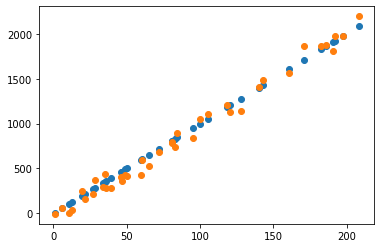

In [174]:
# Scatter points represents predicted value according to y_predicted=slope*x_test+constant and accepted x_test and y_test values
plt.scatter(x_test, predicted_val)
plt.scatter(x_test, y_test)
print("avg loss: %.2f"%(avg_loss(predicted_val,y_test)))
print("avg rms loss: %.2f"%(avg_rms_loss(predicted_val,y_test)))

avg loss: 1447.97
avg rms loss: 1746.57


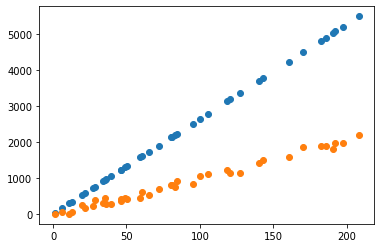

In [175]:
# Scatter points represents new predicted value according to 
# y_predicted=slope_modified*x_test+constant_modified and accepted x_test and y_test values
plt.scatter(x_test, new_predicted_val)
plt.scatter(x_test, y_test)
print("avg loss: %.2f"%(avg_loss(new_predicted_val,y_test)))
print("avg rms loss: %.2f"%(avg_rms_loss(new_predicted_val,y_test)))